# Web scrapping

Primero instalamos y mandamos llamar todas las librerías y paquetes que se necesitaran para el web scrapping y wordcloud

In [1]:
pip install unicode

In [17]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
import nltk # https://www.nltk.org/install.html
import numpy as np # https://www.scipy.org/install.html
import matplotlib.pyplot # https://matplotlib.org/downloads.html
import gensim # https://radimrehurek.com/gensim/install.html
from PIL import Image

In [5]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\leopa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leopa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [110]:
import requests
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk import FreqDist
from nltk.tokenize import word_tokenize
import nltk
from unidecode import unidecode
import string
import re
from PIL import Image

Se realizo la consulta de 10 noticias diferentes, en diferentes portales y de diferentes años sobre Coppel, ya fuera sobre sus tiendas, temas de servicios al cliente o nuevas herramientas que tiene, para brindar un mejor servicio a todos sus usuarios.

## Noticia 1:

En la primera parte se crea el scrapping de la nota, con la librería de "beatifulsoup" y se hace “encoding”, por temas de signos de puntuación especiales en el español, como acentos

In [126]:
url = "https://lasillarota.com/dinero/2023/1/28/eres-cliente-coppel-checa-estos-nuevos-beneficios-411831.html"
response = requests.get(url)
response.encoding='utf-8'
html = response.text
soup = BeautifulSoup(html, 'html.parser')

# Identifica las etiquetas que contienen el texto de la noticia
noticias_tags = soup.find_all('p')  # Puedes ajustar esto según la estructura HTML

# Extrae el texto de las etiquetas identificadas
texto_noticia = ' '.join([tag.get_text() for tag in noticias_tags])

print(texto_noticia)



Coppel lanzó su cartera móvil para los migrantes que se encuentran en Estados Unidos y que no tienen acceso a servicios bancarios, o tiene un acceso restringido, y así poder crear fácilmente una cuenta, utilizando una identificación oficial mexicana o estadounidense. Se trata de la cartera móvil Coppel Access, la aplicación financiera multifuncional, la cual está asegurada por la Corporación Federal de Seguro de Depósitos (FDIC, por sus siglas en inglés), misma que proporciona un acceso fácil y cómodo a las compras en línea que realicen los migrantes, a los pagos en Estados Unidos y al envío de dinero a México. Una vez abierta su cuenta en Coppel Access, los migrantes en EU pueden utilizar la tarjeta de débito digital o física de la cartera móvil para comprar en internet y en plataformas digitales, evitando el riesgo de llevar dinero en efectivo o de mantener grandes sumas de dinero en casa.  De acuerdo con Grupo Coppel, la aplicación Coppel Access se creó para facilitar la gestión fin

En la segunda parte se crea la tokenizacion con la librería NLTK, para segmentar la nota en palabras

In [44]:
# Normalizar caracteres usando unidecode
normalized_text = unidecode(texto_noticia)

# Tokenizar el texto normalizado
tokens = nltk.word_tokenize(normalized_text)

# Filtrar palabras que no son alfanuméricas y convertirlas a minúsculas
words = [word.lower() for word in tokens if word.isalpha()]

print(words)

['coppel', 'lanzo', 'su', 'cartera', 'movil', 'para', 'los', 'migrantes', 'que', 'se', 'encuentran', 'en', 'estados', 'unidos', 'y', 'que', 'no', 'tienen', 'acceso', 'a', 'servicios', 'bancarios', 'o', 'tiene', 'un', 'acceso', 'restringido', 'y', 'asi', 'poder', 'crear', 'facilmente', 'una', 'cuenta', 'utilizando', 'una', 'identificacion', 'oficial', 'mexicana', 'o', 'estadounidense', 'se', 'trata', 'de', 'la', 'cartera', 'movil', 'coppel', 'access', 'la', 'aplicacion', 'financiera', 'multifuncional', 'la', 'cual', 'esta', 'asegurada', 'por', 'la', 'corporacion', 'federal', 'de', 'seguro', 'de', 'depositos', 'fdic', 'por', 'sus', 'siglas', 'en', 'ingles', 'misma', 'que', 'proporciona', 'un', 'acceso', 'facil', 'y', 'comodo', 'a', 'las', 'compras', 'en', 'linea', 'que', 'realicen', 'los', 'migrantes', 'a', 'los', 'pagos', 'en', 'estados', 'unidos', 'y', 'al', 'envio', 'de', 'dinero', 'a', 'mexico', 'una', 'vez', 'abierta', 'su', 'cuenta', 'en', 'coppel', 'access', 'los', 'migrantes', 'e

Después se eliminan las palabras como conectores, dejando solo las palabras principales usando stopwords, también de NLTK

In [45]:
palabras_filtradas1 = [palabra for palabra in tokens if palabra.lower() not in stopwords.words('spanish')]

In [46]:
palabras_filtradas1

['Coppel',
 'lanzo',
 'cartera',
 'movil',
 'migrantes',
 'encuentran',
 'Unidos',
 'acceso',
 'servicios',
 'bancarios',
 ',',
 'acceso',
 'restringido',
 ',',
 'asi',
 'poder',
 'crear',
 'facilmente',
 'cuenta',
 ',',
 'utilizando',
 'identificacion',
 'oficial',
 'mexicana',
 'estadounidense',
 '.',
 'trata',
 'cartera',
 'movil',
 'Coppel',
 'Access',
 ',',
 'aplicacion',
 'financiera',
 'multifuncional',
 ',',
 'asegurada',
 'Corporacion',
 'Federal',
 'Seguro',
 'Depositos',
 '(',
 'FDIC',
 ',',
 'siglas',
 'ingles',
 ')',
 ',',
 'misma',
 'proporciona',
 'acceso',
 'facil',
 'comodo',
 'compras',
 'linea',
 'realicen',
 'migrantes',
 ',',
 'pagos',
 'Unidos',
 'envio',
 'dinero',
 'Mexico',
 '.',
 'vez',
 'abierta',
 'cuenta',
 'Coppel',
 'Access',
 ',',
 'migrantes',
 'EU',
 'pueden',
 'utilizar',
 'tarjeta',
 'debito',
 'digital',
 'fisica',
 'cartera',
 'movil',
 'comprar',
 'internet',
 'plataformas',
 'digitales',
 ',',
 'evitando',
 'riesgo',
 'llevar',
 'dinero',
 'efect

Este mismo ejercicio se repite durante las 10 noticias

## Noticia 2:

In [47]:
url = "https://mexico.corresponsables.com/entrevistas/grupo-coppel-tener-mujeres-en-posiciones-de-liderazgo-nos-ayuda-ampliar-perspectivas-y"
response = requests.get(url)
response.encoding='utf-8'
html = response.text
soup = BeautifulSoup(html, 'html.parser')

# Identifica las etiquetas que contienen el texto de la noticia
noticias_tags = soup.find_all('p')  # Puedes ajustar esto según la estructura HTML

# Extrae el texto de las etiquetas identificadas
texto_noticia = ' '.join([tag.get_text() for tag in noticias_tags])

print(texto_noticia)

 ﻿﻿﻿﻿  ﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿
 ﻿﻿﻿﻿﻿﻿﻿﻿Entrevista a María Luisa Velasco, Directora de Talento y Desarrollo del Grupo Coppel ﻿﻿﻿﻿﻿﻿﻿﻿En 1941 se inicia en Sinaloa, México, una tienda llamada “El Regalo” que por varias generaciones fue un lugar muy querido por los clientes que se sentían escuchados, tenían diversas opciones de compra y facilidades para el pago, con esta fórmula de éxito, el Grupo Coppel crece por todo México y tienen presencia en Argentina. Tienen más de 14 millones de clientes con una línea de crédito activa para comprar sus productos o adquirir sus servicios financieros.
 
En México cuentan con una red de más de 1,700 tiendas y más de 120,000 colaboradores, constituyéndose en el décimo más grande empleador del país.
 
En el Grupo Coppel al área de Recursos Humanos, se le denomina Talento y Desarrollo, “Elegimos estas palabras porque el talento de nuestra gente ha sido una de nuestras ventajas competitivas y grandes fortalezas, y siempre se ha tenido la visión de poner a las person

In [48]:
# Normalizar caracteres usando unidecode
normalized_text = unidecode(texto_noticia)

# Tokenizar el texto normalizado
tokens = nltk.word_tokenize(normalized_text)

# Filtrar palabras que no son alfanuméricas y convertirlas a minúsculas
words = [word.lower() for word in tokens if word.isalpha()]

print(words)

['entrevista', 'a', 'maria', 'luisa', 'velasco', 'directora', 'de', 'talento', 'y', 'desarrollo', 'del', 'grupo', 'coppel', 'en', 'se', 'inicia', 'en', 'sinaloa', 'mexico', 'una', 'tienda', 'llamada', 'el', 'regalo', 'que', 'por', 'varias', 'generaciones', 'fue', 'un', 'lugar', 'muy', 'querido', 'por', 'los', 'clientes', 'que', 'se', 'sentian', 'escuchados', 'tenian', 'diversas', 'opciones', 'de', 'compra', 'y', 'facilidades', 'para', 'el', 'pago', 'con', 'esta', 'formula', 'de', 'exito', 'el', 'grupo', 'coppel', 'crece', 'por', 'todo', 'mexico', 'y', 'tienen', 'presencia', 'en', 'argentina', 'tienen', 'mas', 'de', 'millones', 'de', 'clientes', 'con', 'una', 'linea', 'de', 'credito', 'activa', 'para', 'comprar', 'sus', 'productos', 'o', 'adquirir', 'sus', 'servicios', 'financieros', 'en', 'mexico', 'cuentan', 'con', 'una', 'red', 'de', 'mas', 'de', 'tiendas', 'y', 'mas', 'de', 'colaboradores', 'constituyendose', 'en', 'el', 'decimo', 'mas', 'grande', 'empleador', 'del', 'pais', 'en', '

In [49]:
palabras_filtradas2 = [palabra for palabra in tokens if palabra.lower() not in stopwords.words('spanish')]

## Noticia 3:

In [50]:
url = "https://www.elsoldetampico.com.mx/local/alerta-coppel-a-sus-clientes-ante-intentos-de-estafas-7686972.html"
response = requests.get(url)
response.encoding='utf-8'
html = response.text
soup = BeautifulSoup(html, 'html.parser')

# Identifica las etiquetas que contienen el texto de la noticia
noticias_tags = soup.find_all('p')  # Puedes ajustar esto según la estructura HTML

# Extrae el texto de las etiquetas identificadas
texto_noticia = ' '.join([tag.get_text() for tag in noticias_tags])

print(texto_noticia)


  / martes 4 de enero de 2022
 
Teresa Macías | El Sol de Tampico
 La tienda departamental Coppel alertó a sus clientes sobre presuntos intentos de fraudes o estafas por parte de personas ajenas al establecimiento. De acuerdo con un memorándum pegado en la entrada de la tienda sucursal Soriana Aeropuerto en Tampico, la empresa informó que en días recientes detectó la presencia de personas intentando sorprender a los clientes de la cadena nacional.  


 Regional 








Pide IP quitar retén entre Tamaulipas y Nuevo León




 
 Regional 
 Ante ello la tienda alertó: “Estimada clientela, se les informa que en días pasados, personas ajenas a Coppel (estando fuera de la tienda) se acercan de forma sutil y amable para pedirles hagan diversos trámites en Cajas de Abono o Bancoppel. Indicando que el gerente de la unidad ya está enterado”. Suscríbete a la edición digital de El Sol de Tampico aquí En el mensaje advierten que la tienda no procede de esa forma y que cada trámite debe ser persona

In [51]:
# Normalizar caracteres usando unidecode
normalized_text = unidecode(texto_noticia)

# Tokenizar el texto normalizado
tokens = nltk.word_tokenize(normalized_text)

# Filtrar palabras que no son alfanuméricas y convertirlas a minúsculas
words = [word.lower() for word in tokens if word.isalpha()]

print(words)

['martes', 'de', 'enero', 'de', 'teresa', 'macias', 'el', 'sol', 'de', 'tampico', 'la', 'tienda', 'departamental', 'coppel', 'alerto', 'a', 'sus', 'clientes', 'sobre', 'presuntos', 'intentos', 'de', 'fraudes', 'o', 'estafas', 'por', 'parte', 'de', 'personas', 'ajenas', 'al', 'establecimiento', 'de', 'acuerdo', 'con', 'un', 'memorandum', 'pegado', 'en', 'la', 'entrada', 'de', 'la', 'tienda', 'sucursal', 'soriana', 'aeropuerto', 'en', 'tampico', 'la', 'empresa', 'informo', 'que', 'en', 'dias', 'recientes', 'detecto', 'la', 'presencia', 'de', 'personas', 'intentando', 'sorprender', 'a', 'los', 'clientes', 'de', 'la', 'cadena', 'nacional', 'regional', 'pide', 'ip', 'quitar', 'reten', 'entre', 'tamaulipas', 'y', 'nuevo', 'leon', 'regional', 'ante', 'ello', 'la', 'tienda', 'alerto', 'estimada', 'clientela', 'se', 'les', 'informa', 'que', 'en', 'dias', 'pasados', 'personas', 'ajenas', 'a', 'coppel', 'estando', 'fuera', 'de', 'la', 'tienda', 'se', 'acercan', 'de', 'forma', 'sutil', 'y', 'amabl

In [52]:
palabras_filtradas3 = [palabra for palabra in tokens if palabra.lower() not in stopwords.words('spanish')]

## Noticia 4:

In [53]:
url = "https://www.la-prensa.com.mx/doble-via/es-real-el-supuesto-brazalete-geolocalizador-de-coppel-esto-sabemos-9299954.html"
response = requests.get(url)
response.encoding='utf-8'
html = response.text
soup = BeautifulSoup(html, 'html.parser')

# Identifica las etiquetas que contienen el texto de la noticia
noticias_tags = soup.find_all('p')  # Puedes ajustar esto según la estructura HTML

# Extrae el texto de las etiquetas identificadas
texto_noticia = ' '.join([tag.get_text() for tag in noticias_tags])

print(texto_noticia)


  / jueves 8 de diciembre de 2022
 
Yennyfer Mena | La Prensa
 A través de redes sociales se ha viralizado un supuesto brazalete con el logotipo de Coppel "para localizar" a los compradores deudores, sin embargo, la existencia de este dispositivo es falso. En TikTok el usuario _medicenelchino muestra un supuesto brazalete con el logotipo de Coppel. "Los de Coppel ya me pusieron localizador, para cuando me vengan a cobrar no les digan que no estoy", se puede leer en el video y se muestra cómo es la pulsera. El video ha generado angustias a ciertos seguidores y han lanzado comentarios como: “es en serio?”, “Me llamaban, ya saben si no pagan lo que pasa”, “ojalá sea broma por qué si no ya m frege”, “a caray x que te pusieron eso brooo”, “Netaaaa”, entre otros comentarios de usuarios espantados  


  @_medicenelchino aguas deudores!!!!@Coppel #coppel #deuda #localizador ♬ A Mover el Bote - Organo Juventud Mixteco   



 Pero a otros más que asisten a concierto este brazalete se les hizo p

In [54]:
# Normalizar caracteres usando unidecode
normalized_text = unidecode(texto_noticia)

# Tokenizar el texto normalizado
tokens = nltk.word_tokenize(normalized_text)

# Filtrar palabras que no son alfanuméricas y convertirlas a minúsculas
words = [word.lower() for word in tokens if word.isalpha()]

print(words)

['jueves', 'de', 'diciembre', 'de', 'yennyfer', 'mena', 'la', 'prensa', 'a', 'traves', 'de', 'redes', 'sociales', 'se', 'ha', 'viralizado', 'un', 'supuesto', 'brazalete', 'con', 'el', 'logotipo', 'de', 'coppel', 'para', 'localizar', 'a', 'los', 'compradores', 'deudores', 'sin', 'embargo', 'la', 'existencia', 'de', 'este', 'dispositivo', 'es', 'falso', 'en', 'tiktok', 'el', 'usuario', 'muestra', 'un', 'supuesto', 'brazalete', 'con', 'el', 'logotipo', 'de', 'coppel', 'los', 'de', 'coppel', 'ya', 'me', 'pusieron', 'localizador', 'para', 'cuando', 'me', 'vengan', 'a', 'cobrar', 'no', 'les', 'digan', 'que', 'no', 'estoy', 'se', 'puede', 'leer', 'en', 'el', 'video', 'y', 'se', 'muestra', 'como', 'es', 'la', 'pulsera', 'el', 'video', 'ha', 'generado', 'angustias', 'a', 'ciertos', 'seguidores', 'y', 'han', 'lanzado', 'comentarios', 'como', 'es', 'en', 'serio', 'me', 'llamaban', 'ya', 'saben', 'si', 'no', 'pagan', 'lo', 'que', 'pasa', 'ojala', 'sea', 'broma', 'por', 'que', 'si', 'no', 'ya', 'm'

In [55]:
palabras_filtradas4 = [palabra for palabra in tokens if palabra.lower() not in stopwords.words('spanish')]

## Noticia 5:

In [56]:
url = "https://regeneracion.mx/coppel-vende-perfumes-pirata-senala-ex-empleado/"
response = requests.get(url)
response.encoding='utf-8'
html = response.text
soup = BeautifulSoup(html, 'html.parser')

# Identifica las etiquetas que contienen el texto de la noticia
noticias_tags = soup.find_all('p')  # Puedes ajustar esto según la estructura HTML

# Extrae el texto de las etiquetas identificadas
texto_noticia = ' '.join([tag.get_text() for tag in noticias_tags])

print(texto_noticia)

RegeneraciónMX Sitio de noticias libre e independiente Un tiktoker que dice ser exempleado de Coppel, denunció que supuestamente los perfumes que venden son reemplazados por copias pirata El usuario Derek Villas denunció que los empleados reemplazan los perfumes originales por clones Regeneración, 9 de abril de 2021. TikTok también se ha convertido en una red social de denuncia. En esta ocasión se han difundido denuncias sobre las estafas que se realizan en la tienda Coppel. La cadena comercial de tiendas Coppel es ahora el blanco de las críticas debido a que muchos usuarios han compartido videos sobre las presuntas estafas de los empleados de la tienda. Coppel es identificada por dar créditos personales, además de vender productos de diversos tipos. Desde ropa, calzado y hasta electrodomésticos, las tiendas se han vuelto populares a nivel nacional. La polémica que ahora se desató es que empleados de la cadena de tiendas departamentales ponen en venta perfumes clones a precio de origin

In [58]:
# Normalizar caracteres usando unidecode
normalized_text = unidecode(texto_noticia)

# Tokenizar el texto normalizado
tokens = nltk.word_tokenize(normalized_text)

# Filtrar palabras que no son alfanuméricas y convertirlas a minúsculas
words = [word.lower() for word in tokens if word.isalpha()]

print(words)

['regeneracionmx', 'sitio', 'de', 'noticias', 'libre', 'e', 'independiente', 'un', 'tiktoker', 'que', 'dice', 'ser', 'exempleado', 'de', 'coppel', 'denuncio', 'que', 'supuestamente', 'los', 'perfumes', 'que', 'venden', 'son', 'reemplazados', 'por', 'copias', 'pirata', 'el', 'usuario', 'derek', 'villas', 'denuncio', 'que', 'los', 'empleados', 'reemplazan', 'los', 'perfumes', 'originales', 'por', 'clones', 'regeneracion', 'de', 'abril', 'de', 'tiktok', 'tambien', 'se', 'ha', 'convertido', 'en', 'una', 'red', 'social', 'de', 'denuncia', 'en', 'esta', 'ocasion', 'se', 'han', 'difundido', 'denuncias', 'sobre', 'las', 'estafas', 'que', 'se', 'realizan', 'en', 'la', 'tienda', 'coppel', 'la', 'cadena', 'comercial', 'de', 'tiendas', 'coppel', 'es', 'ahora', 'el', 'blanco', 'de', 'las', 'criticas', 'debido', 'a', 'que', 'muchos', 'usuarios', 'han', 'compartido', 'videos', 'sobre', 'las', 'presuntas', 'estafas', 'de', 'los', 'empleados', 'de', 'la', 'tienda', 'coppel', 'es', 'identificada', 'por'

In [59]:
palabras_filtradas5 = [palabra for palabra in tokens if palabra.lower() not in stopwords.words('spanish')]

## Noticia 6:

In [60]:
url = "https://www.infobae.com/mexico/2023/07/27/que-me-puede-pasar-si-debo-a-coppel-desde-hace-10-anos/"
response = requests.get(url)
response.encoding='utf-8'
html = response.text
soup = BeautifulSoup(html, 'html.parser')

# Identifica las etiquetas que contienen el texto de la noticia
noticias_tags = soup.find_all('p')  # Puedes ajustar esto según la estructura HTML

# Extrae el texto de las etiquetas identificadas
texto_noticia = ' '.join([tag.get_text() for tag in noticias_tags])

print(texto_noticia)

20 Nov, 2023 Por  Claudia Flores La empresa Coppel ha ido creciendo al pasar de los años en México, debido a sus tres unidades de negocio con las que cuenta como son: BanCoppel, Tiendas Coppel y Afore Coppel, motivo por el cual decenas de clientes pueden llegar incrementar su deuda con la compañía e incluso llegar al Buró de Crédito. En ese sentido, aquí detallaremos qué hacer si te encuentras en un nivel de endeudamiento desde hace años. Hay que recordar que el Buró de Crédito son Sociedades de Información de Crédito (SIC), las cuales se encargan de recopilar la información de los usuarios. Es decir, en él se detalla la manera en que pagan las personas a instituciones bancarias o tiendas departamentales, así como los financiamientos que adquieren durante varios años. -La mala noticia es que la empresa tendrá derecho a cobrar por todo el tiempo de la deuda, incluyendo intereses. Sin embargo, es posible que pueda acceder a un plan de pagos que se adapte a sus “bolsillos” -La persona ing

In [61]:
# Normalizar caracteres usando unidecode
normalized_text = unidecode(texto_noticia)

# Tokenizar el texto normalizado
tokens = nltk.word_tokenize(normalized_text)

# Filtrar palabras que no son alfanuméricas y convertirlas a minúsculas
words = [word.lower() for word in tokens if word.isalpha()]

print(words)

['nov', 'por', 'claudia', 'flores', 'la', 'empresa', 'coppel', 'ha', 'ido', 'creciendo', 'al', 'pasar', 'de', 'los', 'anos', 'en', 'mexico', 'debido', 'a', 'sus', 'tres', 'unidades', 'de', 'negocio', 'con', 'las', 'que', 'cuenta', 'como', 'son', 'bancoppel', 'tiendas', 'coppel', 'y', 'afore', 'coppel', 'motivo', 'por', 'el', 'cual', 'decenas', 'de', 'clientes', 'pueden', 'llegar', 'incrementar', 'su', 'deuda', 'con', 'la', 'compania', 'e', 'incluso', 'llegar', 'al', 'buro', 'de', 'credito', 'en', 'ese', 'sentido', 'aqui', 'detallaremos', 'que', 'hacer', 'si', 'te', 'encuentras', 'en', 'un', 'nivel', 'de', 'endeudamiento', 'desde', 'hace', 'anos', 'hay', 'que', 'recordar', 'que', 'el', 'buro', 'de', 'credito', 'son', 'sociedades', 'de', 'informacion', 'de', 'credito', 'sic', 'las', 'cuales', 'se', 'encargan', 'de', 'recopilar', 'la', 'informacion', 'de', 'los', 'usuarios', 'es', 'decir', 'en', 'el', 'se', 'detalla', 'la', 'manera', 'en', 'que', 'pagan', 'las', 'personas', 'a', 'instituc

In [62]:
palabras_filtradas6 = [palabra for palabra in tokens if palabra.lower() not in stopwords.words('spanish')]

## Noticia 7:

In [63]:
url = "https://primeraplana.mx/archivos/957424"
response = requests.get(url)
response.encoding='utf-8'
html = response.text
soup = BeautifulSoup(html, 'html.parser')

# Identifica las etiquetas que contienen el texto de la noticia
noticias_tags = soup.find_all('p')  # Puedes ajustar esto según la estructura HTML

# Extrae el texto de las etiquetas identificadas
texto_noticia = ' '.join([tag.get_text() for tag in noticias_tags])

print(texto_noticia)





 
Cocineras_Primera_Plana-41A PLANA 1200x100px 



 Ciudad de México Como parte del plan de apoyo de Grupo Coppel a las personas afectadas por el huracán Otis en Guerrero, Coppel anunció este martes 31 de octubre que diferirá el pago de créditos personales en las zonas impactadas del estado hasta por 3 meses. El programa incluye diferir los pagos de todos los productos de tarjeta de crédito y todos los préstamos a personas físicas de BanCoppel por tres meses. Para clientes con crédito tiendas Coppel, este congelamiento de crédito sin costo, aplicará para crédito de muebles, ropa y préstamo personal, por el mismo periodo. Para acceder a estos programas, que en el caso de BanCoppel se adhieren a las medidas anunciadas por la Comisión Nacional Bancaria y de Valores (CNBV) y la Asociación de Bancos de México (ABM), los clientes, de ambas empresas, deberán estar al corriente en sus pagos y residir en los municipios afectados en el estado de Guerrero. Los clientes beneficiados entrarán e

In [64]:
# Normalizar caracteres usando unidecode
normalized_text = unidecode(texto_noticia)

# Tokenizar el texto normalizado
tokens = nltk.word_tokenize(normalized_text)

# Filtrar palabras que no son alfanuméricas y convertirlas a minúsculas
words = [word.lower() for word in tokens if word.isalpha()]

print(words)

['plana', 'ciudad', 'de', 'mexico', 'como', 'parte', 'del', 'plan', 'de', 'apoyo', 'de', 'grupo', 'coppel', 'a', 'las', 'personas', 'afectadas', 'por', 'el', 'huracan', 'otis', 'en', 'guerrero', 'coppel', 'anuncio', 'este', 'martes', 'de', 'octubre', 'que', 'diferira', 'el', 'pago', 'de', 'creditos', 'personales', 'en', 'las', 'zonas', 'impactadas', 'del', 'estado', 'hasta', 'por', 'meses', 'el', 'programa', 'incluye', 'diferir', 'los', 'pagos', 'de', 'todos', 'los', 'productos', 'de', 'tarjeta', 'de', 'credito', 'y', 'todos', 'los', 'prestamos', 'a', 'personas', 'fisicas', 'de', 'bancoppel', 'por', 'tres', 'meses', 'para', 'clientes', 'con', 'credito', 'tiendas', 'coppel', 'este', 'congelamiento', 'de', 'credito', 'sin', 'costo', 'aplicara', 'para', 'credito', 'de', 'muebles', 'ropa', 'y', 'prestamo', 'personal', 'por', 'el', 'mismo', 'periodo', 'para', 'acceder', 'a', 'estos', 'programas', 'que', 'en', 'el', 'caso', 'de', 'bancoppel', 'se', 'adhieren', 'a', 'las', 'medidas', 'anuncia

In [65]:
palabras_filtradas7 = [palabra for palabra in tokens if palabra.lower() not in stopwords.words('spanish')]

## Noticia 8:

In [66]:
url = "https://www.elsoldepuebla.com.mx/finanzas/en-cuanto-tiempo-vencen-las-deudas-en-coppel-y-elektra-si-no-las-pagas-10825487.html"
response = requests.get(url)
response.encoding='utf-8'
html = response.text
soup = BeautifulSoup(html, 'html.parser')

# Identifica las etiquetas que contienen el texto de la noticia
noticias_tags = soup.find_all('p')  # Puedes ajustar esto según la estructura HTML

# Extrae el texto de las etiquetas identificadas
texto_noticia = ' '.join([tag.get_text() for tag in noticias_tags])

print(texto_noticia)


  / miércoles 11 de octubre de 2023
 
Guillermo Pichardo | El Sol de Puebla
 Aunque suele ser tomado a chiste, es una realidad que dos de las cadenas más importantes de tiendas departamentales en México son Coppel y Elektra, pues pese a las altas tasas de intereses que puedan manejar, una parte importante de la población recurre a estas para adquirir los muebles de su vivienda debido a la posibilidad de los llamados “pagos chiquitos” sin importar el tiempo. Pero es justo debido al tiempo otorgado y el bajo aporte a capital que en muchas ocasiones los objetos terminan por quedar tasados en un elevado valor, por lo que hay quienes al no poder subsanar la deuda la dejan sin pagar, lo que termina por enviar a quien solicitó el crédito al Buró, imposibilitando la solicitud de otros prestamos, pero, ¿en cuánto tiempo vencen estas deudas? Se debe partir del hecho de que estas empresas pertenecen al sistema de crédito en México, una entidad que se encuentra avalada por la Secretaría de Hacien

In [67]:
# Normalizar caracteres usando unidecode
normalized_text = unidecode(texto_noticia)

# Tokenizar el texto normalizado
tokens = nltk.word_tokenize(normalized_text)

# Filtrar palabras que no son alfanuméricas y convertirlas a minúsculas
words = [word.lower() for word in tokens if word.isalpha()]

print(words)

['miercoles', 'de', 'octubre', 'de', 'guillermo', 'pichardo', 'el', 'sol', 'de', 'puebla', 'aunque', 'suele', 'ser', 'tomado', 'a', 'chiste', 'es', 'una', 'realidad', 'que', 'dos', 'de', 'las', 'cadenas', 'mas', 'importantes', 'de', 'tiendas', 'departamentales', 'en', 'mexico', 'son', 'coppel', 'y', 'elektra', 'pues', 'pese', 'a', 'las', 'altas', 'tasas', 'de', 'intereses', 'que', 'puedan', 'manejar', 'una', 'parte', 'importante', 'de', 'la', 'poblacion', 'recurre', 'a', 'estas', 'para', 'adquirir', 'los', 'muebles', 'de', 'su', 'vivienda', 'debido', 'a', 'la', 'posibilidad', 'de', 'los', 'llamados', 'pagos', 'chiquitos', 'sin', 'importar', 'el', 'tiempo', 'pero', 'es', 'justo', 'debido', 'al', 'tiempo', 'otorgado', 'y', 'el', 'bajo', 'aporte', 'a', 'capital', 'que', 'en', 'muchas', 'ocasiones', 'los', 'objetos', 'terminan', 'por', 'quedar', 'tasados', 'en', 'un', 'elevado', 'valor', 'por', 'lo', 'que', 'hay', 'quienes', 'al', 'no', 'poder', 'subsanar', 'la', 'deuda', 'la', 'dejan', 's

In [68]:
palabras_filtradas8 = [palabra for palabra in tokens if palabra.lower() not in stopwords.words('spanish')]

## Noticia 9:

In [69]:
url = "https://mvsnoticias.com/economia/2023/11/16/buen-fin-2023-conoce-los-metodos-de-pago-de-coppel-614914.html"
response = requests.get(url)
response.encoding='utf-8'
html = response.text
soup = BeautifulSoup(html, 'html.parser')

# Identifica las etiquetas que contienen el texto de la noticia
noticias_tags = soup.find_all('p')  # Puedes ajustar esto según la estructura HTML

# Extrae el texto de las etiquetas identificadas
texto_noticia = ' '.join([tag.get_text() for tag in noticias_tags])

print(texto_noticia)

El Buen Fin 2023 se acerca y con este evento muchas promociones y descuentos para México, Coppel una de las tiendas más famosas del país y dio a conocer con cuántos métodos de pago cuenta para facilitar las compras de sus clientes.  Coppel es una cadena de tiendas departamentales mexicana que ofrece una amplia variedad de productos y servicios. Durante este Buen Fin 2023 como en ediciones anteriores, la tienda departamental, ofrece promociones y descuentos en una extensa gama de productos, que incluyen ropa, calzado, electrodomésticos, muebles, productos electrónicos, juguetes, entre otros. Uno de los sellos de identidad de la tienda es que la empresa brinda la posibilidad de comprar productos a crédito, permitiendo a los clientes pagar en cómodas cuotas. A través de su servicio de crédito, los clientes pueden adquirir productos incluso si no cuentan con el pago completo en el momento de la compra. Este modelo ha sido especialmente popular entre aquellos que buscan opciones de financia

In [70]:
# Normalizar caracteres usando unidecode
normalized_text = unidecode(texto_noticia)

# Tokenizar el texto normalizado
tokens = nltk.word_tokenize(normalized_text)

# Filtrar palabras que no son alfanuméricas y convertirlas a minúsculas
words = [word.lower() for word in tokens if word.isalpha()]

print(words)

['el', 'buen', 'fin', 'se', 'acerca', 'y', 'con', 'este', 'evento', 'muchas', 'promociones', 'y', 'descuentos', 'para', 'mexico', 'coppel', 'una', 'de', 'las', 'tiendas', 'mas', 'famosas', 'del', 'pais', 'y', 'dio', 'a', 'conocer', 'con', 'cuantos', 'metodos', 'de', 'pago', 'cuenta', 'para', 'facilitar', 'las', 'compras', 'de', 'sus', 'clientes', 'coppel', 'es', 'una', 'cadena', 'de', 'tiendas', 'departamentales', 'mexicana', 'que', 'ofrece', 'una', 'amplia', 'variedad', 'de', 'productos', 'y', 'servicios', 'durante', 'este', 'buen', 'fin', 'como', 'en', 'ediciones', 'anteriores', 'la', 'tienda', 'departamental', 'ofrece', 'promociones', 'y', 'descuentos', 'en', 'una', 'extensa', 'gama', 'de', 'productos', 'que', 'incluyen', 'ropa', 'calzado', 'electrodomesticos', 'muebles', 'productos', 'electronicos', 'juguetes', 'entre', 'otros', 'uno', 'de', 'los', 'sellos', 'de', 'identidad', 'de', 'la', 'tienda', 'es', 'que', 'la', 'empresa', 'brinda', 'la', 'posibilidad', 'de', 'comprar', 'produ

In [71]:
palabras_filtradas9 = [palabra for palabra in tokens if palabra.lower() not in stopwords.words('spanish')]

## Noticia 10:

In [72]:
url = "https://www.elsoldelalaguna.com.mx/finanzas/aumenta-morosidad-en-creditos-populares-banco-azteca-bancoppel-forjadores-pagos-cnbv-5455747.html"
response = requests.get(url)
response.encoding='utf-8'
html = response.text
soup = BeautifulSoup(html, 'html.parser')

# Identifica las etiquetas que contienen el texto de la noticia
noticias_tags = soup.find_all('p')  # Puedes ajustar esto según la estructura HTML

# Extrae el texto de las etiquetas identificadas
texto_noticia = ' '.join([tag.get_text() for tag in noticias_tags])

print(texto_noticia)


  / lunes 6 de julio de 2020
 
Mario Alavez | El Sol de México
 El porcentaje de clientes con retraso en el pago de sus créditos aumenta entre los bancos , prestan a la población de menores ingresos se acelera mientras la rentabilidad de algunas de estas instituciones se deteriora. De acuerdo con la Comisión Nacional Bancaria y de Valores (CNBV), la morosidad del sistema bancario se ubica en 2.3 por ciento, pero entre aquellas instituciones que prestan a la población no asalariada hay casos en lo que el crecimiento se aceleró en los meses recientes.  


 Finanzas 








México no participa en subastas: AMLO pide a Banxico cuidar reservas




 
 Finanzas 
 En el caso de Banco Azteca, su Índice de Morosidad, es decir la cartera vencida como proporción del financiamiento total otorgado, pasó de 3.6 a 11.2 por ciento entre diciembre y abril. En el caso de BanCoppel aumentó de 9.6 a 14.7 por ciento. Con los niveles de incumplimiento más altos se ubicó Banco Ahorro Famsa, que recientement

In [73]:
# Normalizar caracteres usando unidecode
normalized_text = unidecode(texto_noticia)

# Tokenizar el texto normalizado
tokens = nltk.word_tokenize(normalized_text)

# Filtrar palabras que no son alfanuméricas y convertirlas a minúsculas
words = [word.lower() for word in tokens if word.isalpha()]

print(words)

['lunes', 'de', 'julio', 'de', 'mario', 'alavez', 'el', 'sol', 'de', 'mexico', 'el', 'porcentaje', 'de', 'clientes', 'con', 'retraso', 'en', 'el', 'pago', 'de', 'sus', 'creditos', 'aumenta', 'entre', 'los', 'bancos', 'prestan', 'a', 'la', 'poblacion', 'de', 'menores', 'ingresos', 'se', 'acelera', 'mientras', 'la', 'rentabilidad', 'de', 'algunas', 'de', 'estas', 'instituciones', 'se', 'deteriora', 'de', 'acuerdo', 'con', 'la', 'comision', 'nacional', 'bancaria', 'y', 'de', 'valores', 'cnbv', 'la', 'morosidad', 'del', 'sistema', 'bancario', 'se', 'ubica', 'en', 'por', 'ciento', 'pero', 'entre', 'aquellas', 'instituciones', 'que', 'prestan', 'a', 'la', 'poblacion', 'no', 'asalariada', 'hay', 'casos', 'en', 'lo', 'que', 'el', 'crecimiento', 'se', 'acelero', 'en', 'los', 'meses', 'recientes', 'finanzas', 'mexico', 'no', 'participa', 'en', 'subastas', 'amlo', 'pide', 'a', 'banxico', 'cuidar', 'reservas', 'finanzas', 'en', 'el', 'caso', 'de', 'banco', 'azteca', 'su', 'indice', 'de', 'morosida

In [74]:
palabras_filtradas10 = [palabra for palabra in tokens if palabra.lower() not in stopwords.words('spanish')]

# Wordcloud

Una vez que se ha hecho el web scrapping de las 10 noticias, se han guardado las palabras utilizadas en todas las notas, después de esto se agrupan los tokens en uno solo, para con este poder realizar el wordcloud

In [127]:
palabras_filtradas=palabras_filtradas1+palabras_filtradas2+palabras_filtradas3+palabras_filtradas4+palabras_filtradas5+palabras_filtradas6+palabras_filtradas7+palabras_filtradas8+palabras_filtradas9+palabras_filtradas10

Se eliminan los caracteres, como signos de interrogación, exclamación, paréntesis y demás

In [104]:
patron_puntuacion = re.compile('[%s]' % re.escape(string.punctuation))

# Eliminar puntos, comas, paréntesis, etc. de los tokens
palabras_filtradas = [patron_puntuacion.sub('', token) for token in palabras_filtradas]

print(palabras_filtradas)

['Coppel', 'lanzo', 'cartera', 'movil', 'migrantes', 'encuentran', 'Unidos', 'acceso', 'servicios', 'bancarios', '', 'acceso', 'restringido', '', 'asi', 'poder', 'crear', 'facilmente', 'cuenta', '', 'utilizando', 'identificacion', 'oficial', 'mexicana', 'estadounidense', '', 'trata', 'cartera', 'movil', 'Coppel', 'Access', '', 'aplicacion', 'financiera', 'multifuncional', '', 'asegurada', 'Corporacion', 'Federal', 'Seguro', 'Depositos', '', 'FDIC', '', 'siglas', 'ingles', '', '', 'misma', 'proporciona', 'acceso', 'facil', 'comodo', 'compras', 'linea', 'realicen', 'migrantes', '', 'pagos', 'Unidos', 'envio', 'dinero', 'Mexico', '', 'vez', 'abierta', 'cuenta', 'Coppel', 'Access', '', 'migrantes', 'EU', 'pueden', 'utilizar', 'tarjeta', 'debito', 'digital', 'fisica', 'cartera', 'movil', 'comprar', 'internet', 'plataformas', 'digitales', '', 'evitando', 'riesgo', 'llevar', 'dinero', 'efectivo', 'mantener', 'grandes', 'sumas', 'dinero', 'casa', '', 'acuerdo', 'Grupo', 'Coppel', '', 'aplicaci

Posteriormente se crea la lista de frecuencias de las palabras que son mayormente mencionadas en las noticias, se utiliza una imagen como referencia para la mascara y se pide que se ajuste a esta el grafico que se generara con la herramienta

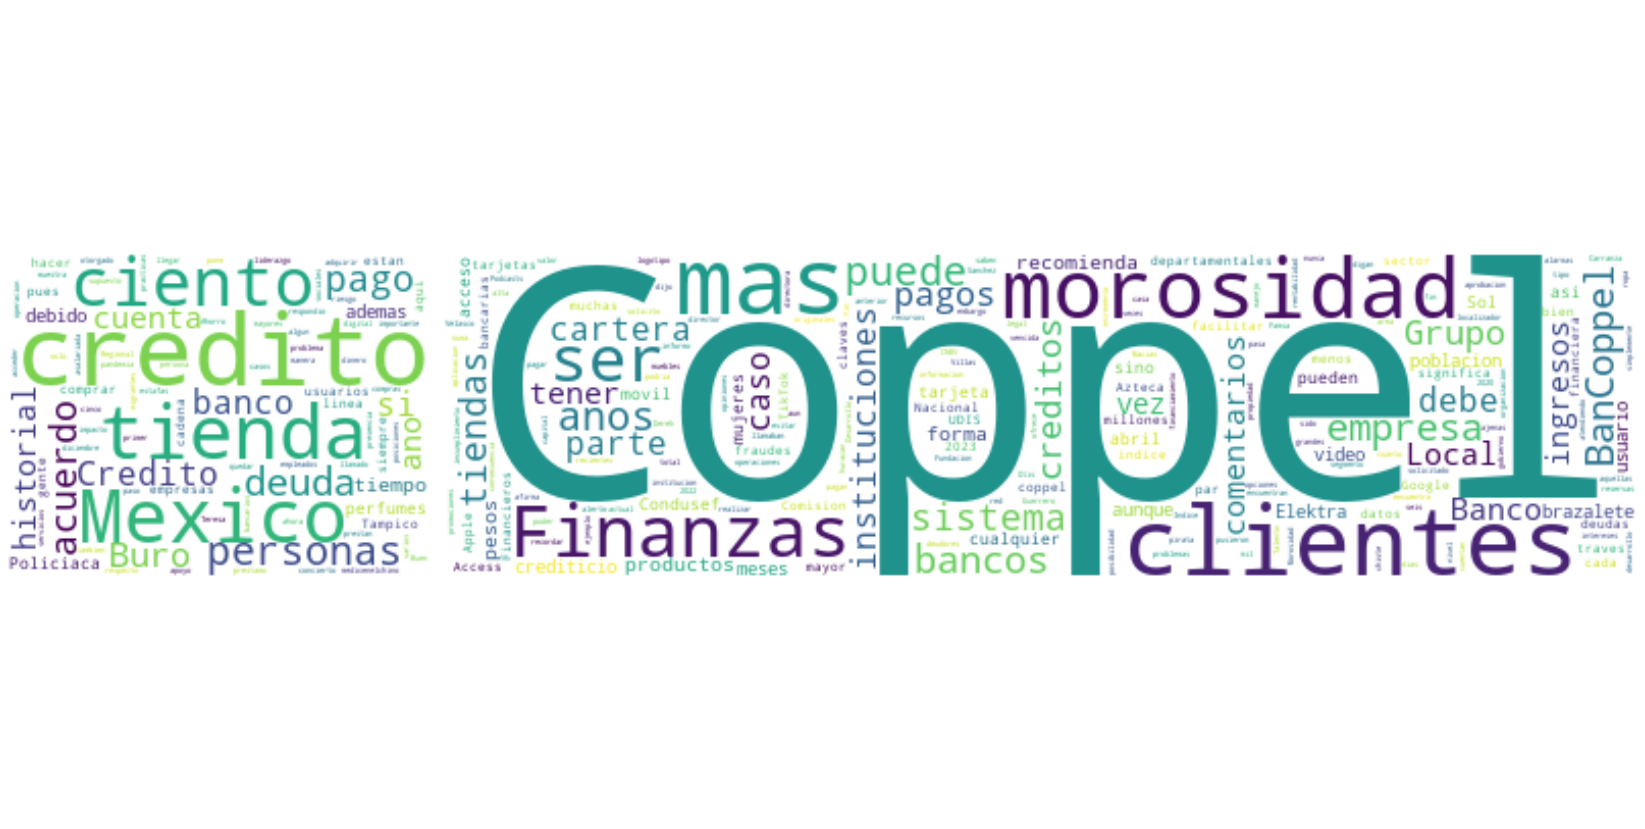

In [125]:
# Calcular la frecuencia de cada palabra
freq_dist = FreqDist(palabras_filtradas)

mask = np.array(Image.open('Coppel7.png').resize((800, 400)))

# Crear un WordCloud
wordcloud = WordCloud(width=1332, height=680, random_state=11, max_font_size=300, background_color='white', max_words=500, collocations=False, mode='RGBA',mask=mask).generate_from_frequencies(freq_dist)

# Visualizar la WordCloud
plt.figure(figsize=(30, 15))
image_colors = ImageColorGenerator(mask)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
